### Import all the Dependencies

In [7]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [8]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

# Import dataset & Preprocessing

In [9]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
        "PlantVillage",
        shuffle=True,
        image_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [12]:
class_names= dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [14]:
len(dataset)

68

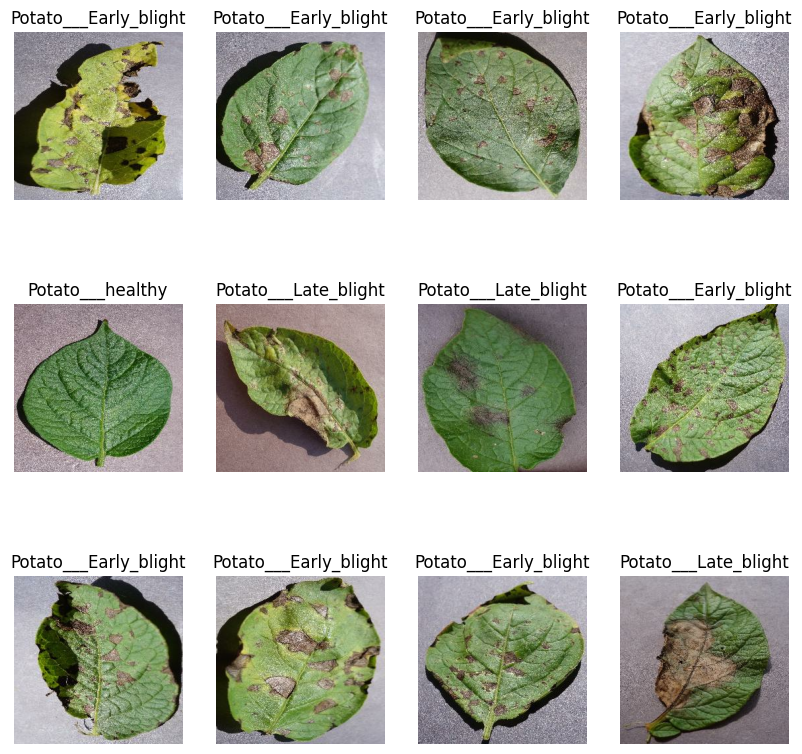

In [15]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
	for i in range(12):
		ax= plt.subplot(3,4,i+1)
		plt.imshow(image_batch[i].numpy().astype("uint8"))
		plt.title(class_names[label_batch[i]])
		plt.axis("off")

In [17]:
len(dataset)

68

In [ ]:
80% ==> training
20% ==> 10% validation, 10% test

In [18]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [19]:
train_ds = dataset.take(54)
len(train_ds)

54

In [20]:
test_ds= dataset.skip(54)
len(test_ds)

14

In [34]:
val_size=0.1
len(dataset)*val_size

6

In [22]:
val_ds= test_ds.take(6)
len(val_ds)


6

In [23]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [24]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds


In [25]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [26]:
len(train_ds)


54

In [27]:
len(val_ds)

6

In [28]:
len(test_ds)

8

In [29]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [30]:
resize_and_rescale = tf.keras.Sequential([
	layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
	layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [31]:
data_augmentation = tf.keras.Sequential([
	layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
	layers.experimental.preprocessing.RandomRotation(0.2),
])

# Build Model & Define the CNN

In [33]:


input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)



In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [37]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Train the CNN

In [38]:
history = model.fit(
	train_ds,
	epochs=EPOCHS,
	batch_size=BATCH_SIZE,
	verbose=1,
	validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 139s 2s/step - loss: 0.9157 - accuracy: 0.4763 - val_loss: 0.8260 - val_accuracy: 0.6250
Epoch 2/50
54/54 [==============================] - 113s 2s/step - loss: 0.7146 - accuracy: 0.6493 - val_loss: 0.5641 - val_accuracy: 0.7448
Epoch 3/50
54/54 [==============================] - 120s 2s/step - loss: 0.4971 - accuracy: 0.7743 - val_loss: 0.4290 - val_accuracy: 0.8281
Epoch 4/50
54/54 [==============================] - 113s 2s/step - loss: 0.3017 - accuracy: 0.8953 - val_loss: 0.5071 - val_accuracy: 0.7812
Epoch 5/50
54/54 [==============================] - 113s 2s/step - loss: 0.2222 - accuracy: 0.9091 - val_loss: 0.2891 - val_accuracy: 0.8646
Epoch 6/50
54/54 [==============================] - 114s 2s/step - loss: 0.1550 - accuracy: 0.9450 - val_loss: 0.9305 - val_accuracy: 0.7188
Epoch 7/50
54/54 [==============================] - 114s 2s/step - loss: 0.1994 - accuracy: 0.9271 - val_loss: 0.2183 - val_accuracy: 0.8958
Epoch 8/50
54

# Check perfomence ==> Accurecy (test) data

In [40]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 3s 395ms/step - loss: 0.0145 - accuracy: 0.9961


In [41]:
scores

[0.014479828998446465, 0.99609375]

In [42]:
history

In [44]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [45]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Ploat in Chart

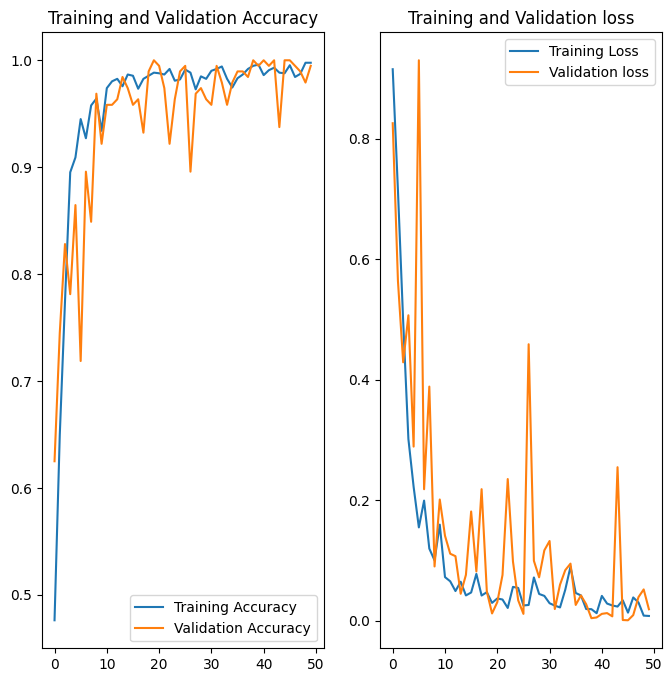

In [49]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')
plt.show()


In [57]:
np.argmax ([9.9999964e-01, 3.9333537e-07, 1.1586251e-18])

0

# Make Prediction

first image to predict
actual label:  Potato___Late_blight
1/1 [==============================] - 0s 412ms/step
predicted label:  Potato___Late_blight


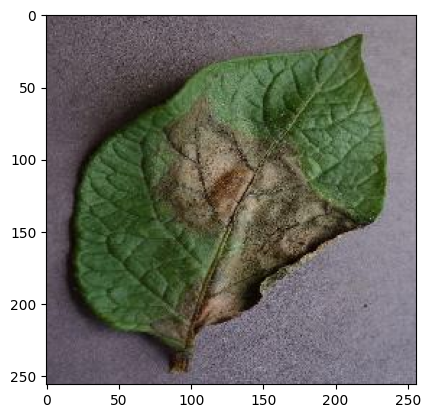

In [59]:
import numpy as np

for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label: ", class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label: ", class_names[np.argmax(batch_prediction[0])])


In [61]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy()) 
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])] 
    confidence = round(100 * np.max(predictions[0]), 2)  
    return predicted_class, confidence


1/1 [==============================] - 0s 32ms/step


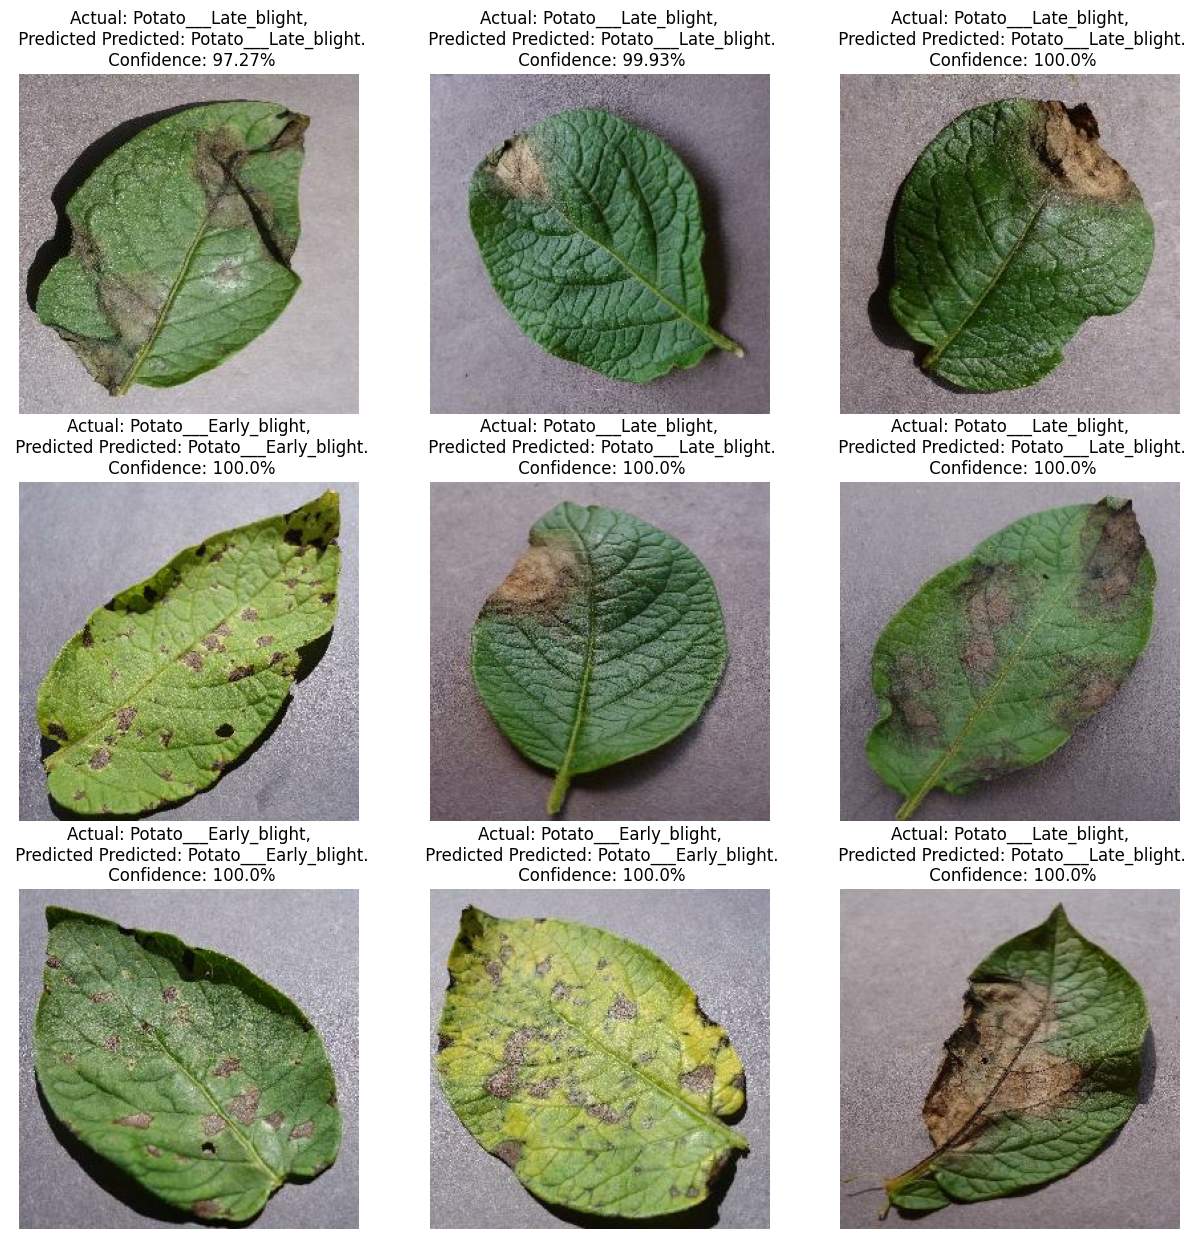

In [64]:
plt.figure(figsize=(15, 15))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy()) 
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted Predicted: {predicted_class}.\n Confidence: {confidence}%") 
        plt.axis("off")

plt.show()

# Save the Model

In [69]:
import os
model_version=max([int(i) for i in os.listdir("../models")+[0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/4\assets


INFO:tensorflow:Assets written to: ../models/4\assets
